## Name: Devshekhar Pattnaik
## Reg No: 19BCE1292
## Slot: L1+2

# <center><u>ML Lab-9 </u></center>

### Code for Perceptron without Scikit-learn

In [29]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        self.plot_data=self.plot_graph
        self.predict=self.predict_data
    

    def fit(self, X, y,X_test,y_test):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])
        count=0

        for _ in range(self.n_iters):
            
            count=count+1
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update
                
            print("Iteration : ",count)
            predictions = self.predict(X_test)
            print("Perceptron classification accuracy", accuracy_score(y_test, predictions))
            print("Perceptron F1 Score", f1_score(y_test, predictions))
            self.plot_data(X,y)
            
                
                

    def predict_data(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)
    
    def plot_graph(self,X_train,y_train):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

        x0_1 = np.amin(X_train[:, 0])
        x0_2 = np.amax(X_train[:, 0])

        x1_1 = (-self.weights[0] * x0_1 - self.bias) / self.weights[1]
        x1_2 = (-self.weights[0] * x0_2 - self.bias) / self.weights[1]

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

        ymin = np.amin(X_train[:, 1])
        ymax = np.amax(X_train[:, 1])
        ax.set_ylim([ymin - 3, ymax + 3])

        plt.show()

Iteration :  1
Perceptron classification accuracy 0.5666666666666667
Perceptron F1 Score 0.7111111111111111


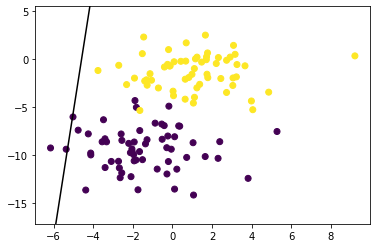

Iteration :  2
Perceptron classification accuracy 0.9666666666666667
Perceptron F1 Score 0.967741935483871


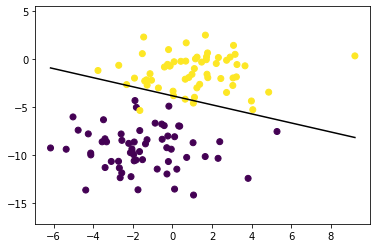

Iteration :  3
Perceptron classification accuracy 0.8333333333333334
Perceptron F1 Score 0.8648648648648648


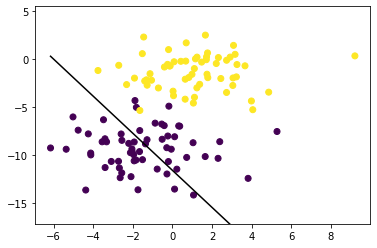

Iteration :  4
Perceptron classification accuracy 1.0
Perceptron F1 Score 1.0


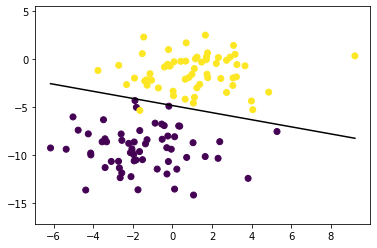

In [30]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=2, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=4)
    p.fit(X_train, y_train,X_test,y_test)

### Code for Perceptron with Scikit-learn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data=pd.read_csv('iris_small.csv')
data.shape
data.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [33]:
data['species']=data['species'].replace({'setosa':1,'versicolor':0})
data.sample(5)

,sepal_length,petal_length,species
85,6.0,4.5,0
16,5.4,1.3,1
67,5.8,4.1,0
51,6.4,4.5,0
55,5.7,4.5,0


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

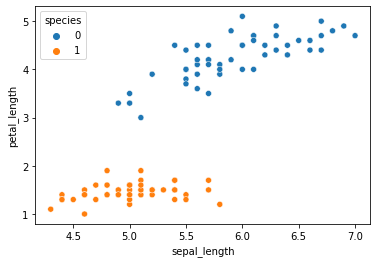

In [34]:
sns.scatterplot(x=data['sepal_length'],y=data['petal_length'],hue=data['species'])

### Splitting dataset into training and testing

In [35]:
from sklearn.model_selection import train_test_split

X=data.iloc[:,0:2].values
y=data.iloc[:,-1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

1.0

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [39]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

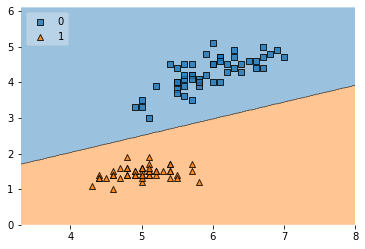

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=clf, legend=2)